# Preparación del dataset de ventas de vehículos

## 1. Librerias y configuraciones previas


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [2]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe 
# cols     : lista de columnas a graficar
# num_cols : número de columnas 
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot 
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe. 
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:     
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):
    
    plt.rcParams['figure.figsize'] = figsize
    
    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)
        
    fig, axs = plt.subplots(num_rows, num_cols)
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        
        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c': 
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

## 3. Carga del dataset

Este dataset extraido de *Kaggle* (nombrado: **car details v4.csv** ) contiene información sobre **vehículos usados**, los cuales serán usados para la predicción de precios de venta, a partir de las diferentes variables.

A continuación una breve descripción de las variables:

****

    
| Campo | Descripción | Ejempo |
| :--- | :--- |:--- |
| Make | Marca  | Honda |
| Model | Modelo  | Amaze 1.2 VX i-VTEC |
| Price | Precio  | 505000 |
| Year | Año  | 2017 |
| Kilometer | Kilometraje  | 87150 |
| Fuel Type | Tipo de combustible  | Petrol |
| Transmission | Tipo de transmisión  | Manual |
| Location | Ubicación  | Pune |
| Color | Color  | Grey |
| Owner | Número de propietarios previos  | First |
| Seller Type | Tipo de vendedor  | Corporate |
| Engine | Tipo de motor  | 1198 cc |
| Max Power | Potencia máxima del motor  | 87 bhp @ 6000 rpm |
| Max Torque | Torque máximo del motor  | 109 Nm @ 4500 rpm |
| Drivetrain | Tipo de tracción  | FWD |
| Length | Longitud  | 3990 |
| Width | Anchura  | 1680 |
| Height | Altura  | 1505 |
| Seating Capacity | Capacidad de asientos  | 5 |
| Fuel Tank Capacity | Capacidad del tanque de combustible  | 35 |

****

Url origen datos: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv


In [3]:
#Cargar el dataset
d=pd.read_csv('./datasets/01_car details v4.csv')

In [4]:
## Cargar datos con colab
## =============================================================================

#from google.colab import drive 
#import os

#drive.mount('/gdrive')

In [5]:
#os.chdir("/gdrive/MyDrive/ModelosCuantitativosPython/Notebooks")
#!ls

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [7]:
d.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


## 4. Limpieza de datos (Data Cleaning)

In [8]:
#Borrando columnas que no se emplearán

d.drop([ 'Model', 'Location', 'Color', 'Max Power', 'Max Torque'], axis='columns', inplace=True)


In [9]:
#Se limpia la variable Engine para convertirla en una variable numérica

#Se borra todos los valores ' cc'
d['Engine'] = d['Engine'].str.replace(' cc', '')

#se convierte a variable tipo float
d['Engine'] = d['Engine'].astype('float64')
d["Engine"].dtype

dtype('float64')

In [10]:
#Verificación y eliminación de registros duplicados

#Verificación de registros duplicados
d.loc[d.duplicated()]

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Owner,Seller Type,Engine,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
258,BMW,2950000,2015,84700,Diesel,Automatic,Second,Individual,2993.0,AWD,4886.0,1938.0,1762.0,5.0,NaN
923,Renault,315000,2017,15507,Petrol,Manual,First,Individual,799.0,FWD,3679.0,1579.0,1478.0,5.0,28.0
1217,Maruti Suzuki,725000,2019,11874,Petrol,Automatic,First,Individual,1197.0,FWD,3840.0,1735.0,1530.0,5.0,37.0
1555,Hyundai,649000,2020,52236,Petrol,Manual,First,Individual,1197.0,FWD,3765.0,1660.0,1520.0,5.0,43.0
1603,Mercedes-Benz,7475000,2021,13000,Diesel,Automatic,First,Individual,1950.0,RWD,5063.0,1860.0,1494.0,5.0,80.0
1856,Skoda,1390000,2017,56000,Petrol,Automatic,First,Individual,1798.0,FWD,4670.0,1814.0,1476.0,5.0,50.0


In [11]:
# eliminación de registros duplicados
d = d.drop_duplicates()

#Reiniciar el indice
d.reset_index(drop=True, inplace=True) 

## 5. Visualización de datos

### Variables de entrada

In [12]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head()

,Make,Fuel Type,Transmission,Owner,Seller Type,Drivetrain
0,Honda,Petrol,Manual,First,Corporate,FWD
1,Maruti Suzuki,Diesel,Manual,Second,Individual,FWD
2,Hyundai,Petrol,Manual,First,Individual,FWD
3,Toyota,Petrol,Manual,First,Individual,FWD
4,Toyota,Diesel,Manual,First,Individual,RWD


In [13]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
d[numCols].head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,1198.0,3990.0,1680.0,1505.0,5.0,35.0
1,450000,2014,75000,1248.0,3995.0,1695.0,1555.0,5.0,42.0
2,220000,2011,67000,1197.0,3585.0,1595.0,1550.0,5.0,35.0
3,799000,2019,37500,1197.0,3995.0,1745.0,1510.0,5.0,37.0
4,1950000,2018,69000,2393.0,4735.0,1830.0,1795.0,7.0,55.0


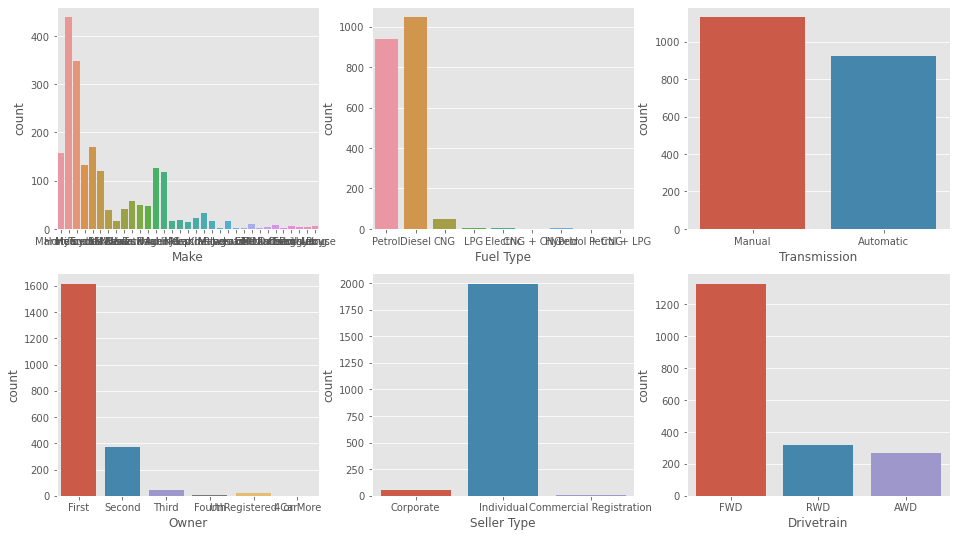

In [14]:
#Visualización de frecuencia de instancias para variables categóricas
plot_multiples_graficas(d,catCols, 3, 2, 'c', None, (16,9))

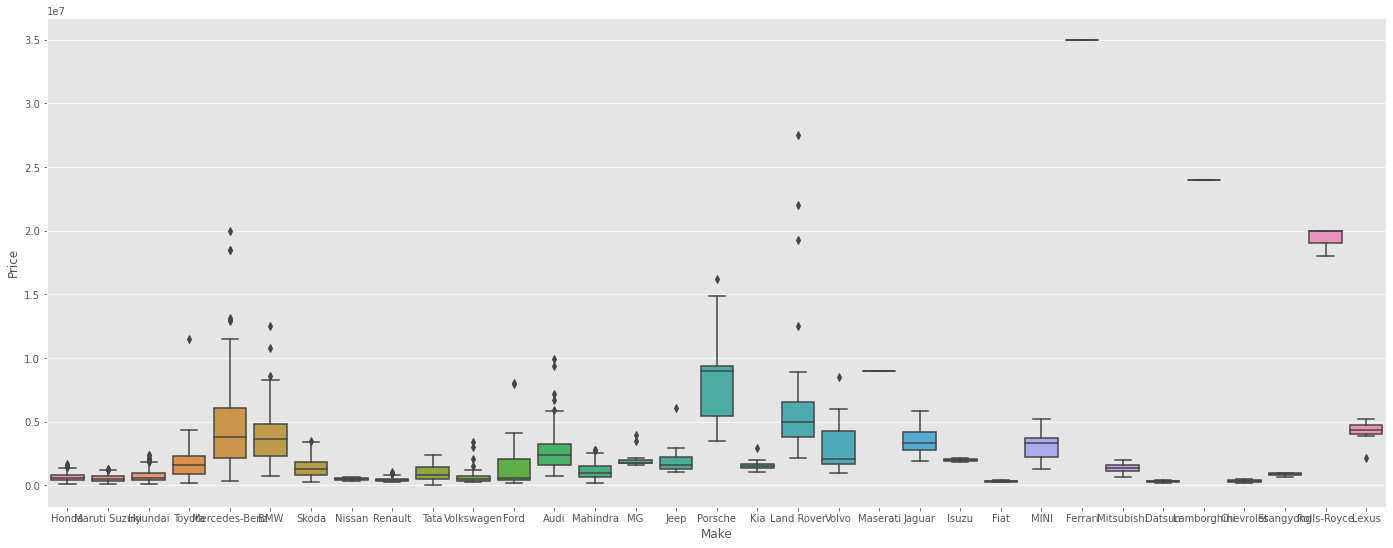

In [15]:
#Visualización por medio de gráficos de caja de bigotes para la variable Make con respecto al precio
plot_multiples_graficas(d,['Make'], 1, 1, 'b', 'Price', (24,9))

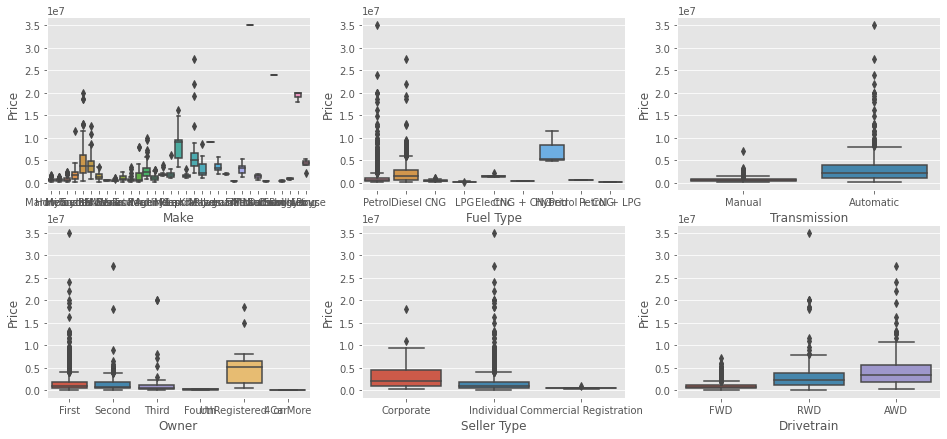

In [16]:
#Visualización por medio de gráficos de caja de bigotes para las variables categóricas con respecto al precio
plot_multiples_graficas (d, catCols, 3, 2, 'b', 'Price', (16,7))

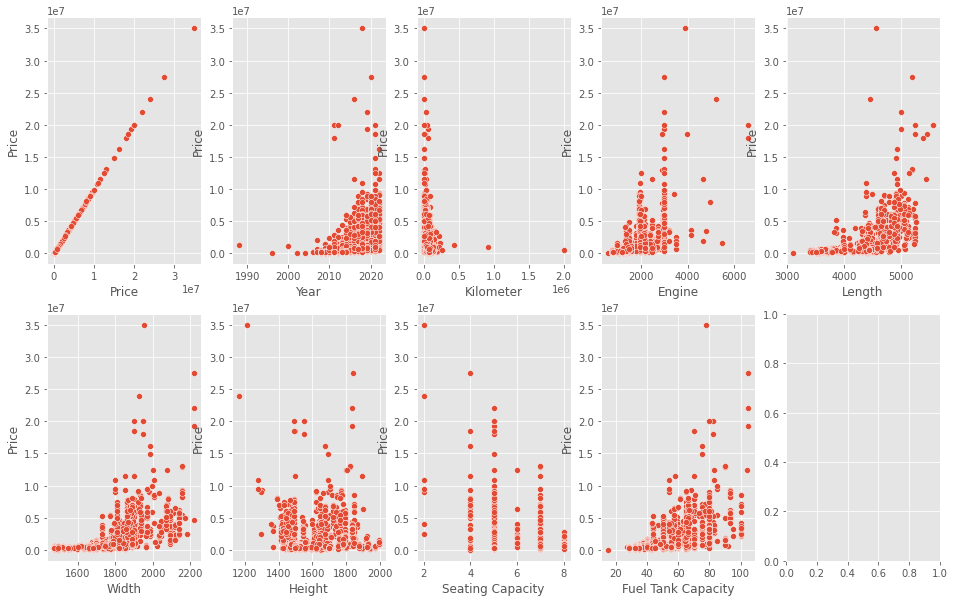

In [17]:
#Visualización de variables numéricas con respecto al precio

plot_multiples_graficas (d, numCols, 5, 2, 's', 'Price', (16,10))


#Tambien puede utilizar la funcion pairplot de seaborn
#sns.pairplot(d[numCols])
#plt.show()

### Variable de salida

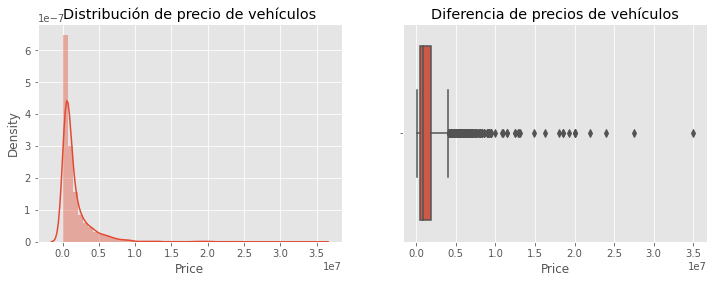

In [18]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de precio de vehículos')
sns.distplot(d['Price'])

plt.subplot(1,2,2)
plt.title('Diferencia de precios de vehículos')
sns.boxplot(x=d['Price'])

plt.show()

In [19]:
#Descripción del precio de los vehículos: Total, media, desviación, mínimo, máximo y percentiles 

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#Descripción
print(d['Price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count       2053
mean     1701391
std      2419495
min        49000
25%       484999
50%       825000
75%      1925000
85%      3100000
90%      4150000
95%      5870000
97.5%    7449500
100%    35000000
max     35000000
Name: Price, dtype: float64


## 6. Preparación de datos

### Valores atípicos de la variable de salida

In [20]:
#Calculo de valores atípicos


#Calculo de Q1 t Q3
Q1 = np.percentile(d['Price'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(d['Price'], 75, interpolation = 'midpoint') 
  
#Cálculo del rango intercuartil    
IQR = Q3 - Q1 

#Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR
   
print(f'Valor atípico leve inferior:{VAInf}') 
print(f'Valor atípico leve superior:{VASup}') 


Valor atípico leve inferior:-1675002.5
Valor atípico leve superior:4085001.5


In [21]:
# Se eliminan los valores atípicos
d = d.drop(d[d['Price']>VASup].index)

#Reiniciar el indice
d.reset_index(drop=True, inplace=True) 

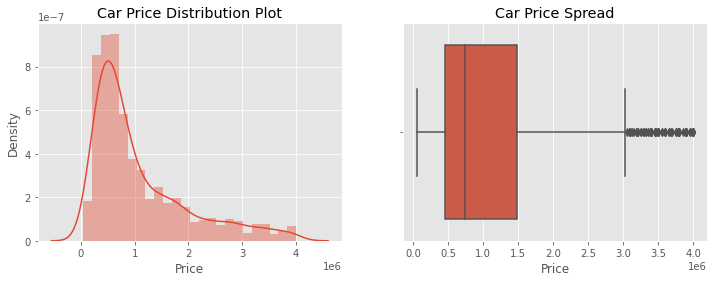

In [22]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(d['Price'])

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=d['Price'])

plt.show()

In [23]:
#Descripción del precio de los vehículos después de eliminar valores atípicos

print(d['Price'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count      1839
mean    1083866
std      889819
min       49000
25%      450000
50%      740000
75%     1480000
85%     1991499
90%     2499200
95%     3125000
97.5%   3500000
100%    4000000
max     4000000
Name: Price, dtype: float64


### Imputaciones

In [24]:
#Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

Price 0
Year 0
Kilometer 0
Engine 75
Length 59
Width 59
Height 59
Seating Capacity 59
Fuel Tank Capacity 95


In [25]:
#Imputación de variables numéricas por medio de KNNImputer

# crear un objeto KNNImputer con k=5
imputer = KNNImputer(n_neighbors=5)

# imputar los valores faltantes en el dataframe
df_imputed = imputer.fit_transform(d[numCols])

# convertir el arreglo numpy devuelto por el imputer en un dataframe
df_imputed = pd.DataFrame(df_imputed, columns=numCols)

# imprimir el dataframe con los valores imputados
df_imputed.head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,505000,2017,87150,1198,3990,1680,1505,5,35
1,450000,2014,75000,1248,3995,1695,1555,5,42
2,220000,2011,67000,1197,3585,1595,1550,5,35
3,799000,2019,37500,1197,3995,1745,1510,5,37
4,1950000,2018,69000,2393,4735,1830,1795,7,55


In [26]:
#Imputación de variables categóricas por medio de SimpleImputer

# crear un objeto SimpleImputer con la estrategia de más frecuente
imputer = SimpleImputer(strategy='most_frequent')

# imputar los valores faltantes en el dataframe
df_imputed2 = imputer.fit_transform(d[catCols])

# convertir el arreglo numpy devuelto por el imputer en un dataframe
df_imputed2 = pd.DataFrame(df_imputed2, columns=catCols)

#imprimir el dataframe con los valores imputados
df_imputed2

,Make,Fuel Type,Transmission,Owner,Seller Type,Drivetrain
0,Honda,Petrol,Manual,First,Corporate,FWD
1,Maruti Suzuki,Diesel,Manual,Second,Individual,FWD
2,Hyundai,Petrol,Manual,First,Individual,FWD
3,Toyota,Petrol,Manual,First,Individual,FWD
4,Toyota,Diesel,Manual,First,Individual,RWD
...,...,...,...,...,...,...
1834,Maruti Suzuki,Petrol,Manual,Second,Individual,FWD
1835,Mahindra,Diesel,Manual,First,Individual,FWD
1836,Hyundai,Petrol,Manual,Second,Individual,FWD
1837,Ford,Petrol,Manual,First,Individual,FWD


In [27]:
#Integración de los dos dataframes (categoricos y numéricos) después de la imputación
d = pd.merge(df_imputed, df_imputed2, left_index=True, right_index=True)
d.head()

,Price,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Make,Fuel Type,Transmission,Owner,Seller Type,Drivetrain
0,505000,2017,87150,1198,3990,1680,1505,5,35,Honda,Petrol,Manual,First,Corporate,FWD
1,450000,2014,75000,1248,3995,1695,1555,5,42,Maruti Suzuki,Diesel,Manual,Second,Individual,FWD
2,220000,2011,67000,1197,3585,1595,1550,5,35,Hyundai,Petrol,Manual,First,Individual,FWD
3,799000,2019,37500,1197,3995,1745,1510,5,37,Toyota,Petrol,Manual,First,Individual,FWD
4,1950000,2018,69000,2393,4735,1830,1795,7,55,Toyota,Diesel,Manual,First,Individual,RWD


In [28]:
#verificación de la imputación: No existen valores nulos
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

Price 0
Year 0
Kilometer 0
Engine 0
Length 0
Width 0
Height 0
Seating Capacity 0
Fuel Tank Capacity 0
Make 0
Fuel Type 0
Transmission 0
Owner 0
Seller Type 0
Drivetrain 0


### Valores atípicos para las variables de entrada

In [29]:
#utilización de LocalOutlierFactor con 14 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=14
lof = LocalOutlierFactor(n_neighbors=14, contamination=0.1)

# identificar los valires atípicos por medio de lof 
y_pred = lof.fit_predict(d[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', d[outliers].index.tolist())


Indices de valores atípicos:  [16, 25, 68, 77, 85, 86, 90, 102, 110, 125, 131, 140, 172, 177, 208, 222, 234, 266, 272, 274, 287, 293, 295, 296, 304, 310, 314, 316, 330, 349, 358, 362, 381, 383, 387, 393, 402, 403, 409, 414, 422, 423, 434, 437, 444, 447, 449, 454, 480, 500, 507, 511, 512, 514, 516, 569, 584, 585, 587, 591, 602, 612, 622, 627, 628, 634, 641, 642, 654, 659, 660, 665, 667, 670, 690, 702, 714, 740, 745, 767, 779, 784, 791, 792, 802, 806, 807, 810, 823, 824, 832, 834, 844, 854, 872, 873, 874, 876, 895, 915, 920, 952, 985, 999, 1004, 1006, 1007, 1008, 1012, 1019, 1025, 1029, 1043, 1045, 1083, 1086, 1122, 1143, 1146, 1148, 1163, 1190, 1196, 1197, 1218, 1223, 1262, 1268, 1295, 1296, 1319, 1323, 1329, 1338, 1352, 1356, 1360, 1369, 1384, 1386, 1421, 1438, 1442, 1447, 1451, 1459, 1467, 1500, 1501, 1507, 1541, 1569, 1578, 1601, 1602, 1605, 1608, 1612, 1614, 1617, 1619, 1622, 1627, 1646, 1665, 1672, 1688, 1711, 1719, 1744, 1747, 1749, 1756, 1768, 1777, 1778, 1789, 1790, 1804, 1806, 

In [30]:
# Eliminar los valores atípicos del dataframe original
d = d.loc[~outliers]

### Transformaciones

In [31]:
#Eliminación de categorias pequeñas para la variable Fuel Type

d['Fuel Type'].value_counts().sort_values(ascending=False)

Petrol          810
Diesel          785
CNG              48
Electric          5
LPG               4
CNG + CNG         1
Petrol + CNG      1
Petrol + LPG      1
Name: Fuel Type, dtype: int64

In [32]:
#Diccionario con los reemplazos a realizar
reemplazos = {  "Electric": "Otro"
              , "LPG": "Otro"
              , "CNG + CNG": "Otro"
              , "Petrol + CNG": "Otro"
              , "Petrol + LPG": "Otro"}


#Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
d['Fuel Type'] = d['Fuel Type'].map(reemplazos).fillna(d['Fuel Type'])

#Visualización de las nuevos valores agrupados para la categoria 'Fuel Type'
d['Fuel Type'].value_counts().sort_values(ascending=False)

Petrol    810
Diesel    785
CNG        48
Otro       12
Name: Fuel Type, dtype: int64

In [133]:
#Discretización (binning) de la variable 'Make'

#Cantidad de instancias por Make
d['Make'].value_counts().sort_values(ascending=False)

Maruti Suzuki    400
Hyundai          323
Honda            142
Toyota           108
Audi              99
Mahindra          97
Mercedes-Benz     84
BMW               65
Volkswagen        44
Tata              43
Ford              43
Renault           38
Skoda             36
Kia               21
MG                17
Jeep              14
Nissan            14
Jaguar            12
Volvo             11
MINI              10
Land Rover         9
Datsun             7
Chevrolet          7
Isuzu              2
Fiat               2
Mitsubishi         2
Ssangyong          2
Lexus              2
Porsche            1
Name: Make, dtype: int64

In [134]:
#Se Calcula la mediana por marca 'Make'

d.groupby('Make').Price.median().sort_values(ascending=False)

Make
Porsche         3600000
Land Rover      3500000
MINI            3250000
Jaguar          3000000
Lexus           3000000
BMW             2650000
Mercedes-Benz   2250000
Audi            2089999
Isuzu           1945500
Volvo           1798999
MG              1780000
Toyota          1750000
Jeep            1667000
Kia             1525000
Skoda           1395000
Mahindra        1050000
Mitsubishi      1050000
Ssangyong        937500
Tata             890000
Hyundai          591000
Honda            585000
Ford             585000
Volkswagen       570000
Maruti Suzuki    535000
Nissan           447500
Renault          419500
Datsun           320000
Chevrolet        320000
Fiat             305000
Name: Price, dtype: float64

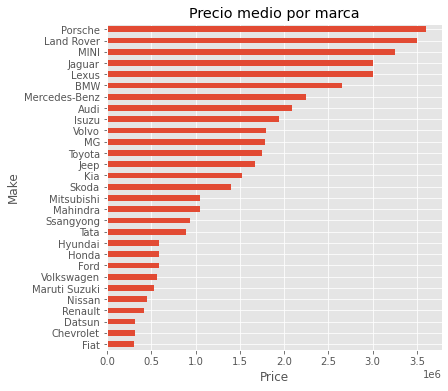

In [135]:
#Gráfica de visualización de precio medio por marca 'Make'
plt.figure(figsize=(6, 6))

d.groupby('Make').Price.median().sort_values(ascending=True).plot.barh()
plt.title("Precio medio por marca")
plt.ylabel("Make")
plt.xlabel("Price")
plt.show()

In [136]:
df= d.groupby('Make').Price.median().sort_values(ascending=False)
df=df.reset_index()
df.head(10)

,Make,Price
0,Porsche,3600000
1,Land Rover,3500000
2,MINI,3250000
3,Jaguar,3000000
4,Lexus,3000000
5,BMW,2650000
6,Mercedes-Benz,2250000
7,Audi,2089999
8,Isuzu,1945500
9,Volvo,1798999


In [137]:
#Se crea una nueva variable que establece el un bin de acuerdo al precio medio por marca

#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#Se define el numero de bins que se quieren crear 
numBins = 6

#Se identifica el maximo valor
max_value = df["Price"].max()

#Se crea la nueva variable PriceRange dando el mayor valor al mayor precio medio
df['PriceRange'] = df['Price'].apply(lambda x: int(round(x / (max_value/numBins))))


df.head()

,Make,Price,PriceRange
0,Porsche,3600000.0000,6
1,Land Rover,3500000.0000,6
2,MINI,3250000.0000,5
3,Jaguar,3000000.0000,5
4,Lexus,3000000.0000,5


In [138]:
#Se adiciona la nueva variable al dataset original
d=pd.merge(d, df[['Make','PriceRange']], on='Make', how='left')

#Se elimina la variable Make
d = d.drop(['Make'], axis=1)

d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1655 entries, 0 to 1654
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1655 non-null   float64
 1   Year                1655 non-null   float64
 2   Kilometer           1655 non-null   float64
 3   Engine              1655 non-null   float64
 4   Length              1655 non-null   float64
 5   Width               1655 non-null   float64
 6   Height              1655 non-null   float64
 7   Seating Capacity    1655 non-null   float64
 8   Fuel Tank Capacity  1655 non-null   float64
 9   Fuel Type           1655 non-null   object 
 10  Transmission        1655 non-null   object 
 11  Owner               1655 non-null   object 
 12  Seller Type         1655 non-null   object 
 13  Drivetrain          1655 non-null   object 
 14  PriceRange          1655 non-null   int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 206.9+

In [139]:
numCols.append('PriceRange')
numCols

['Price',
 'Year',
 'Kilometer',
 'Engine',
 'Length',
 'Width',
 'Height',
 'Seating Capacity',
 'Fuel Tank Capacity',
 'PriceRange']

In [140]:
catCols.remove('Make')
catCols

['Fuel Type', 'Transmission', 'Owner', 'Seller Type', 'Drivetrain']

## 7. Prueba dataset: Creación de un modelo

### Líbrerías

In [141]:
# Preparación de datos
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Modelado
# ==============================================================================
from sklearn.ensemble import RandomForestRegressor


# Evaluación de modelos
# ==============================================================================
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Creación de Variables Dummies

In [142]:
# Aplicación de la función de get_dummies

df =pd.get_dummies(d, drop_first=1)

### Dividir el conjunto de datos

In [143]:
#Se crea una lista con todas las varibles de entrada

vDep = list(df.columns)
vDep.remove('Price')

print(vDep)

['Year', 'Kilometer', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'PriceRange', 'Fuel Type_Diesel', 'Fuel Type_Otro', 'Fuel Type_Petrol', 'Transmission_Manual', 'Owner_First', 'Owner_Fourth', 'Owner_Second', 'Owner_Third', 'Owner_UnRegistered Car', 'Seller Type_Corporate', 'Seller Type_Individual', 'Drivetrain_FWD', 'Drivetrain_RWD']


In [144]:
#Se elimina el elemento Price de la lista de variables numéricas

numCols.remove('Price')

In [145]:
# División de los datos en train y test


# Se establecen los dataframes de con las variables de entrada X y la variable de salida y
X = df[vDep]
y = df['Price']

In [146]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida 

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1), 
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [147]:
#Escalar Variables

# Se establece la configuración para que los valores numéricos se vean con 4 decimales
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[numCols] = scaler.fit_transform(X_train[numCols])
X_test[numCols] = scaler.fit_transform(X_test[numCols])

X_train.head()

,Year,Kilometer,Engine,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,PriceRange,Fuel Type_Diesel,...,Transmission_Manual,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Seller Type_Corporate,Seller Type_Individual,Drivetrain_FWD,Drivetrain_RWD
1313,0.9118,0.5425,0.2212,0.5385,0.5150,0.4914,0.5000,0.4521,0.4000,1,...,1,1,0,0,0,0,0,1,1,0
99,0.9706,0.0667,0.2579,0.3177,0.5180,0.7837,0.3333,0.4110,0.2000,0,...,1,1,0,0,0,0,0,1,0,0
506,0.9412,0.2799,0.1500,0.4954,0.4880,0.4986,0.5000,0.3151,0.4000,1,...,0,1,0,0,0,0,0,1,1,0
638,0.9118,0.2608,0.0865,0.3231,0.3904,0.3123,0.5000,0.1370,0.0000,0,...,0,1,0,0,0,0,0,1,1,0
724,0.7647,0.2570,0.0439,0.1212,0.0000,0.2335,0.5000,0.1096,0.0000,0,...,1,0,0,1,0,0,0,1,1,0


### Creación del un modelo

In [148]:
# Creación del modelo randomForest con con 100 árboles y 5 niveles de profundidad

modelo = RandomForestRegressor(
            n_estimators = 100,
            criterion    = 'mse',
            max_depth    = 5,
            max_features = 'auto',
            oob_score    = False,   #out-of-bag samples
            n_jobs       = -1,
            random_state = 1234
         )


# Entrenamiento del modelo

modelo.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=5, max_features='auto',
                      n_jobs=-1, random_state=1234)

In [149]:
# Error del dataset de entrenamiento

predicciones = modelo.predict(X = X_train)

# Se calcula el rmse
rmse = mean_squared_error(y_true  = y_train, y_pred  = predicciones, squared = False)
print(f"El error rmse de test es: {rmse}")

# Se calcula el r^2
r2 = r2_score(y_train, predicciones)
print(f"El error R^2 de test es: {r2}")


El error rmse de test es: 259085.29057551653
El error R^2 de test es: 0.9172760570261886


In [150]:
# Error del dataset de prueba

predicciones = modelo.predict(X = X_test)

# Se calcula el rmse
rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
print(f"El error rmse de test es: {rmse}")

# Se calcula el r^2
r2 = r2_score(y_test, predicciones)
print(f"El error r^2 de test es: {r2}")

El error rmse de test es: 396872.8243591866
El error r^2 de test es: 0.8180879287597104


## 8. Exportar el dataset

In [151]:
# Exportamos el dataframe a un archivo CSV
d.to_csv('./datasets/01_carDetailsV4_Prep.csv', index=False)

### Referencias


- *Dataset:*  
    - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv
    
    
- *Machine learning con Python y Scikit-learn:*
    - https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
    
    
- *LocalOutlierFactor:*
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
    

- *scikit-learn:*    
    - https://scikit-learn.org/stable/
    - https://scikit-learn.org/stable/user_guide.html
  
  
- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180

  